In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler


In [2]:
traffic_data=(r'..\data\traffic_data.xlsx')
satelit_data=(r'..\data\AgERA5_4params_graz.csv')
temporal_data=(r'..\data\new_5sta(DNOWS)_3com(NO2,PM10K,O3)_year2010_TemporalDummies_Ox_holidays_meteo.csv')

In [3]:
df_satelit= pd.read_csv(satelit_data,index_col = 0)

In [4]:
df_temporal =pd.read_csv(temporal_data,index_col = 0)

In [5]:
df_satelit.index = pd.to_datetime(df_satelit.index)

In [6]:
df_ulice = pd.read_excel(traffic_data, engine='openpyxl', sheet_name='street', index_col=0)
df_ulice_podaci = pd.read_excel(traffic_data, engine='openpyxl', sheet_name='traffic_data', index_col=0)

In [7]:
df_temporal.index = pd.to_datetime(df_temporal.index)

In [8]:
df_ulice = df_ulice.drop(['Unnamed: 1'],axis = 1)

In [9]:
df_temporal

,D_NO2,D_PM10K,N_NO2,N_O3,N_PM10K,O_NO2,O_PM10K,S_NO2,S_O3,S_PM10K,...,Sud_Windspeed,West_RH,West_Temp,West_Winddirection,West_Windspeed,Ost_Pressure,Ost_RH,Ost_Temp,Ost_Winddirection,Ost_Windspeed
2010-01-01,62.420425,48.681210,37.758297,4.000452,34.853405,52.362980,41.291916,45.165530,2.108327,58.876480,...,0.358427,83.031044,3.497470,189.95006,0.326422,NaN,NaN,NaN,NaN,NaN
2010-01-02,49.886177,148.307540,25.938934,4.637932,45.783848,36.956390,76.422780,33.300850,1.795727,169.943600,...,0.279739,86.777100,3.033653,214.33745,0.206639,NaN,NaN,NaN,NaN,NaN
2010-01-03,21.900616,21.664154,11.074873,34.357640,10.978717,15.286636,16.273163,14.216703,30.359385,19.864191,...,1.893668,56.488766,2.953737,278.73930,2.640419,NaN,NaN,NaN,NaN,NaN
2010-01-04,36.261917,21.462568,18.268064,48.127280,14.785930,24.183193,20.439781,26.544174,43.230330,26.680067,...,1.136650,44.811253,-0.571709,285.80966,1.023319,NaN,NaN,NaN,NaN,NaN
2010-01-05,71.757225,53.670230,41.781490,12.211806,32.000100,42.627240,43.426716,51.446163,7.382785,54.818146,...,0.428190,73.859795,-4.016794,198.60895,0.356867,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-03,33.136486,18.087683,14.935202,47.710407,18.953040,19.609596,14.622527,21.049612,36.083650,15.733115,...,0.673823,57.975098,18.413990,264.72040,0.624361,973.1446,73.206460,18.672241,182.59240,0.435133
2021-07-04,19.907900,14.338615,8.624179,78.167210,15.033513,14.503092,14.373650,13.824055,67.281296,14.214394,...,0.901104,49.535610,21.988039,179.25130,0.576749,972.4365,60.177140,22.199862,130.74823,0.562957
2021-07-05,20.364044,16.338556,16.112087,66.048890,17.262230,12.612704,15.058688,12.696744,70.662820,13.985309,...,0.634559,58.139606,20.624140,174.17639,0.545803,969.7183,71.621360,20.727047,139.74475,0.418278
2021-07-06,24.437843,19.290907,7.977263,71.018890,15.782174,15.851383,17.253944,13.073669,58.211086,14.010532,...,1.140109,57.618786,21.858849,198.03795,0.677458,969.6665,74.613620,21.856710,129.45146,0.462159


In [10]:
df_temporal=df_temporal['2018-01-01':'2020-03-15']

In [11]:
#df_local=df_local['2018-01-01':'2020-03-15']
df_ulice_podaci=df_ulice_podaci['2018-01-01':'2020-03-15']
df_satelit=df_satelit['2018-01-01':'2020-03-15']


In [12]:
df_ulice_podaci.columns

Index(['Ost_8010_208', 'DonBosco_8020_110', 'DonBosco_8020_119',
       'DonBosco_8020_122', 'DonBosco_8053_111', 'Nord_8010_205',
       'Ost_8010_209', 'Ost_8010_213', 'Ost_8010_214', 'Nord_8020_102',
       'West_8020_103', 'Sud_8020_107', 'Sud_8041_218', 'Ost_8041_221',
       'Nord_8045_203', 'Nord_8051_101'],
      dtype='object')

In [13]:
df_satelit_new = df_satelit[['Cloud_Cover_Mean','Wind_Speed_10m_Mean']]

In [14]:
df_temporal_new = df_temporal[['year', 'dayofyear',
       'month_Apr', 'month_Aug', 'month_Dec', 'month_Feb', 'month_Jan',
       'month_Jul', 'month_Jun', 'month_Mar', 'month_May', 'month_Nov',
       'month_Oct', 'month_Sep', 'weekday_Friday', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'season_fall', 'season_spring',
       'season_summer', 'season_winter','holiday',
       'holiday_school']]

In [15]:
df_ulice_podaci = df_ulice_podaci.fillna(df_ulice_podaci.mean())


In [16]:
df_ulice_podaci.columns

Index(['Ost_8010_208', 'DonBosco_8020_110', 'DonBosco_8020_119',
       'DonBosco_8020_122', 'DonBosco_8053_111', 'Nord_8010_205',
       'Ost_8010_209', 'Ost_8010_213', 'Ost_8010_214', 'Nord_8020_102',
       'West_8020_103', 'Sud_8020_107', 'Sud_8041_218', 'Ost_8041_221',
       'Nord_8045_203', 'Nord_8051_101'],
      dtype='object')

In [17]:
traffic_roads = ['Ost_8010_208', 'DonBosco_8020_110', 'DonBosco_8020_119',
       'DonBosco_8020_122', 'DonBosco_8053_111', 'Nord_8010_205',
       'Ost_8010_209', 'Ost_8010_213', 'Ost_8010_214', 'Nord_8020_102',
       'West_8020_103', 'Sud_8020_107', 'Sud_8041_218', 'Ost_8041_221',
       'Nord_8045_203', 'Nord_8051_101']

In [18]:
models = {'lr':LinearRegression,
          'kn':KNeighborsRegressor,
          'rf':RandomForestRegressor,
          'dt':DecisionTreeRegressor}

In [19]:
data_model = pd.concat([df_ulice_podaci,df_satelit_new,df_temporal_new],axis= 1)

In [20]:
data_model

,Ost_8010_208,DonBosco_8020_110,DonBosco_8020_119,DonBosco_8020_122,DonBosco_8053_111,Nord_8010_205,Ost_8010_209,Ost_8010_213,Ost_8010_214,Nord_8020_102,...,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,season_fall,season_spring,season_summer,season_winter,holiday,holiday_school
2018-01-01,663.0,534.0,624.0,668.0,467.0,352.0,344.0,364.0,341.0,622.0,...,0,0,0,0,0,0,0,1,1,1
2018-01-02,927.0,924.0,772.0,1191.0,904.0,673.0,563.0,544.0,702.0,1181.0,...,0,0,1,0,0,0,0,1,0,1
2018-01-03,962.0,922.0,772.0,1206.0,883.0,699.0,587.0,553.0,711.0,1149.0,...,0,0,0,1,0,0,0,1,0,1
2018-01-04,978.0,941.0,801.0,1233.0,900.0,720.0,606.0,565.0,726.0,1176.0,...,0,1,0,0,0,0,0,1,0,1
2018-01-05,1027.0,986.0,852.0,1278.0,946.0,743.0,613.0,604.0,762.0,1278.0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-11,931.0,1193.0,469.0,1342.0,1019.0,683.0,698.0,680.0,812.0,1396.0,...,0,0,0,1,0,1,0,0,0,0
2020-03-12,922.0,1158.0,478.0,1333.0,992.0,652.0,664.0,669.0,792.0,1366.0,...,0,1,0,0,0,1,0,0,0,0
2020-03-13,892.0,1166.0,492.0,1371.0,989.0,655.0,639.0,689.0,817.0,1424.0,...,0,0,0,0,0,1,0,0,0,0
2020-03-14,487.0,727.0,341.0,877.0,613.0,320.0,359.0,382.0,447.0,872.0,...,0,0,0,0,0,1,0,0,0,0


In [21]:
sc = StandardScaler() 

# model s svim vrijednostima

In [22]:
dictionary={}
for traffic in traffic_roads: 
    temp_dict = {}
    for model_key in models.keys():
        model= models[model_key]
        
        model = model()
        X_train = data_model.drop(traffic,axis=1)
        Y_test = df_ulice_podaci[[traffic]]
        X_train,X_test,Y_train,Y_test = train_test_split(X_train,Y_test, random_state = 0)
        X_scaled_train = sc.fit_transform(X_train)
        X_scaled_test = sc.transform(X_test)
        model.fit(X_train,Y_train)
        predictions = model.predict(X_test)
        r2 = r2_score(Y_test, predictions)
        
        temp_dict.update({model_key:r2})
        print(temp_dict)
    dictionary.update({traffic:temp_dict})    
        
data = pd.DataFrame.from_dict(dictionary)

{'lr': 0.805991819702248}
{'lr': 0.805991819702248, 'kn': 0.8006962513703255}


C:\Users\vpetric\AppData\Local\Temp/ipykernel_13092/2258582518.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,Y_train)


{'lr': 0.805991819702248, 'kn': 0.8006962513703255, 'rf': 0.8745590306469931}
{'lr': 0.805991819702248, 'kn': 0.8006962513703255, 'rf': 0.8745590306469931, 'dt': 0.7288835248486955}
{'lr': 0.9624207989154755}
{'lr': 0.9624207989154755, 'kn': 0.9518412309633981}


C:\Users\vpetric\AppData\Local\Temp/ipykernel_13092/2258582518.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,Y_train)


{'lr': 0.9624207989154755, 'kn': 0.9518412309633981, 'rf': 0.9711889519124964}
{'lr': 0.9624207989154755, 'kn': 0.9518412309633981, 'rf': 0.9711889519124964, 'dt': 0.9454121960602572}
{'lr': 0.6289935869672728}
{'lr': 0.6289935869672728, 'kn': 0.6834165990707803}


C:\Users\vpetric\AppData\Local\Temp/ipykernel_13092/2258582518.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,Y_train)


{'lr': 0.6289935869672728, 'kn': 0.6834165990707803, 'rf': 0.795806268629673}
{'lr': 0.6289935869672728, 'kn': 0.6834165990707803, 'rf': 0.795806268629673, 'dt': 0.5860770397218056}
{'lr': 0.9640740228813767}
{'lr': 0.9640740228813767, 'kn': 0.9632379973035011}


C:\Users\vpetric\AppData\Local\Temp/ipykernel_13092/2258582518.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,Y_train)


{'lr': 0.9640740228813767, 'kn': 0.9632379973035011, 'rf': 0.9602823911550156}
{'lr': 0.9640740228813767, 'kn': 0.9632379973035011, 'rf': 0.9602823911550156, 'dt': 0.9385572101323333}
{'lr': 0.9710278893457122}
{'lr': 0.9710278893457122, 'kn': 0.9732472324572159}


C:\Users\vpetric\AppData\Local\Temp/ipykernel_13092/2258582518.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,Y_train)


{'lr': 0.9710278893457122, 'kn': 0.9732472324572159, 'rf': 0.9808131263900701}
{'lr': 0.9710278893457122, 'kn': 0.9732472324572159, 'rf': 0.9808131263900701, 'dt': 0.9549736434440972}
{'lr': 0.9300400467513661}
{'lr': 0.9300400467513661, 'kn': 0.9497430865876092}


C:\Users\vpetric\AppData\Local\Temp/ipykernel_13092/2258582518.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,Y_train)


{'lr': 0.9300400467513661, 'kn': 0.9497430865876092, 'rf': 0.9464832754861321}
{'lr': 0.9300400467513661, 'kn': 0.9497430865876092, 'rf': 0.9464832754861321, 'dt': 0.8739588934109703}
{'lr': 0.8761432651780208}
{'lr': 0.8761432651780208, 'kn': 0.8876047878316585}


C:\Users\vpetric\AppData\Local\Temp/ipykernel_13092/2258582518.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,Y_train)


{'lr': 0.8761432651780208, 'kn': 0.8876047878316585, 'rf': 0.9223392893087642}
{'lr': 0.8761432651780208, 'kn': 0.8876047878316585, 'rf': 0.9223392893087642, 'dt': 0.8699066183616957}
{'lr': 0.9665483272319307}
{'lr': 0.9665483272319307, 'kn': 0.9481796465780938}


C:\Users\vpetric\AppData\Local\Temp/ipykernel_13092/2258582518.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,Y_train)


{'lr': 0.9665483272319307, 'kn': 0.9481796465780938, 'rf': 0.9648839464182003}
{'lr': 0.9665483272319307, 'kn': 0.9481796465780938, 'rf': 0.9648839464182003, 'dt': 0.8885256291941614}
{'lr': 0.9588652099432522}
{'lr': 0.9588652099432522, 'kn': 0.9602553673216893}


C:\Users\vpetric\AppData\Local\Temp/ipykernel_13092/2258582518.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,Y_train)


{'lr': 0.9588652099432522, 'kn': 0.9602553673216893, 'rf': 0.9700334501007133}
{'lr': 0.9588652099432522, 'kn': 0.9602553673216893, 'rf': 0.9700334501007133, 'dt': 0.9424837280289647}
{'lr': 0.9782091800512616}
{'lr': 0.9782091800512616, 'kn': 0.970356548493342}


C:\Users\vpetric\AppData\Local\Temp/ipykernel_13092/2258582518.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,Y_train)


{'lr': 0.9782091800512616, 'kn': 0.970356548493342, 'rf': 0.9788205282330499}
{'lr': 0.9782091800512616, 'kn': 0.970356548493342, 'rf': 0.9788205282330499, 'dt': 0.9466426636457492}
{'lr': 0.9837889855527538}
{'lr': 0.9837889855527538, 'kn': 0.9623915622690037}


C:\Users\vpetric\AppData\Local\Temp/ipykernel_13092/2258582518.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,Y_train)


{'lr': 0.9837889855527538, 'kn': 0.9623915622690037, 'rf': 0.9806233199693509}
{'lr': 0.9837889855527538, 'kn': 0.9623915622690037, 'rf': 0.9806233199693509, 'dt': 0.9631643911165988}
{'lr': 0.7183630230049896}
{'lr': 0.7183630230049896, 'kn': 0.777732550239345}


C:\Users\vpetric\AppData\Local\Temp/ipykernel_13092/2258582518.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,Y_train)


{'lr': 0.7183630230049896, 'kn': 0.777732550239345, 'rf': 0.7754839084864618}
{'lr': 0.7183630230049896, 'kn': 0.777732550239345, 'rf': 0.7754839084864618, 'dt': 0.6370180682951001}
{'lr': 0.9318690538646762}
{'lr': 0.9318690538646762, 'kn': 0.9046885688747913}


C:\Users\vpetric\AppData\Local\Temp/ipykernel_13092/2258582518.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,Y_train)


{'lr': 0.9318690538646762, 'kn': 0.9046885688747913, 'rf': 0.9401021651740494}
{'lr': 0.9318690538646762, 'kn': 0.9046885688747913, 'rf': 0.9401021651740494, 'dt': 0.9235943112517805}
{'lr': 0.9287004341303431}
{'lr': 0.9287004341303431, 'kn': 0.8919983403217948}


C:\Users\vpetric\AppData\Local\Temp/ipykernel_13092/2258582518.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,Y_train)


{'lr': 0.9287004341303431, 'kn': 0.8919983403217948, 'rf': 0.9229893866933789}
{'lr': 0.9287004341303431, 'kn': 0.8919983403217948, 'rf': 0.9229893866933789, 'dt': 0.8680865801715817}
{'lr': 0.7639868453171602}
{'lr': 0.7639868453171602, 'kn': 0.8506056728609224}


C:\Users\vpetric\AppData\Local\Temp/ipykernel_13092/2258582518.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,Y_train)


{'lr': 0.7639868453171602, 'kn': 0.8506056728609224, 'rf': 0.8907663454787565}
{'lr': 0.7639868453171602, 'kn': 0.8506056728609224, 'rf': 0.8907663454787565, 'dt': 0.8806202807752143}
{'lr': 0.956770381677621}
{'lr': 0.956770381677621, 'kn': 0.9389567678804948}


C:\Users\vpetric\AppData\Local\Temp/ipykernel_13092/2258582518.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,Y_train)


{'lr': 0.956770381677621, 'kn': 0.9389567678804948, 'rf': 0.9707956714608403}
{'lr': 0.956770381677621, 'kn': 0.9389567678804948, 'rf': 0.9707956714608403, 'dt': 0.9654662210229001}


In [45]:
data

,Ost_8010_208,DonBosco_8020_110,DonBosco_8020_119,DonBosco_8020_122,DonBosco_8053_111,Nord_8010_205,Ost_8010_209,Ost_8010_213,Ost_8010_214,Nord_8020_102,West_8020_103,Sud_8020_107,Sud_8041_218,Ost_8041_221,Nord_8045_203,Nord_8051_101
lr,0.805992,0.962421,0.628994,0.964074,0.971028,0.930040,0.876143,0.966548,0.958865,0.978209,0.983789,0.718363,0.931869,0.928700,0.763987,0.956770
kn,0.800696,0.951841,0.683417,0.963238,0.973247,0.949743,0.887605,0.948180,0.960255,0.970357,0.962392,0.777733,0.904689,0.891998,0.850606,0.938957
rf,0.881247,0.971227,0.806086,0.957343,0.979993,0.943799,0.926195,0.964822,0.968900,0.978002,0.981753,0.764044,0.936043,0.924344,0.889386,0.969897
dt,0.777374,0.949350,0.599794,0.939155,0.956830,0.869987,0.809407,0.884754,0.939111,0.942083,0.957389,0.758547,0.923764,0.870758,0.873544,0.931058


In [46]:
import seaborn as sns

<AxesSubplot:>

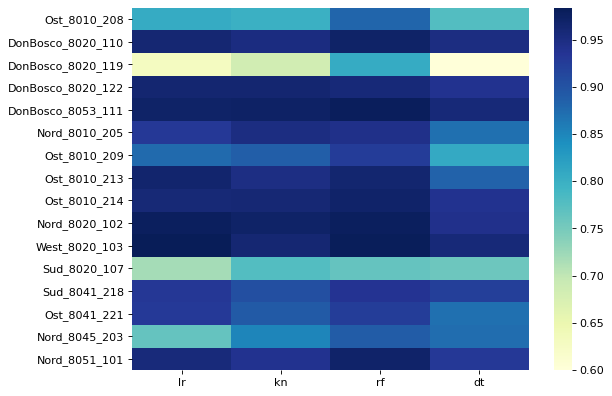

In [47]:
plt.figure(figsize=(8, 6), dpi=80)
sns.heatmap(data.T,cmap="YlGnBu")


# model s trafficom samo 


In [48]:
dictionary={}
for traffic in traffic_roads: 
    temp_dict = {}
    for model_key in models.keys():
        model= models[model_key]
        
        model = model()
        X_train = df_ulice_podaci.drop(traffic,axis=1)
        Y_test = df_ulice_podaci[[traffic]]
        X_train,X_test,Y_train,Y_test = train_test_split(X_train,Y_test, random_state = 0)
        model.fit(X_train,Y_train)
        predictions = model.predict(X_test)
        r2 = r2_score(Y_test, predictions)
        
        temp_dict.update({model_key:r2})
    dictionary.update({traffic:temp_dict})    
        
data = pd.DataFrame.from_dict(dictionary)

C:\Users\vpetric\AppData\Local\Temp/ipykernel_15972/3854974289.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,Y_train)
C:\Users\vpetric\AppData\Local\Temp/ipykernel_15972/3854974289.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,Y_train)
C:\Users\vpetric\AppData\Local\Temp/ipykernel_15972/3854974289.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,Y_train)
C:\Users\vpetric\AppData\Local\Temp/ipykernel_15972/3854974289.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X

<AxesSubplot:>

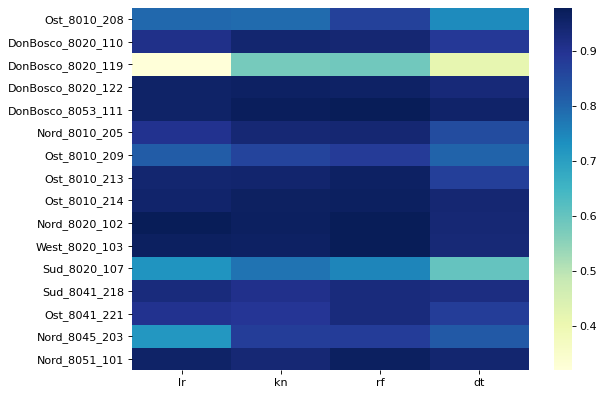

In [49]:
plt.figure(figsize=(8, 6), dpi=80)
sns.heatmap(data.T,cmap="YlGnBu")